# The Spark Foundation - Data Science & Business Analytics Internship

## TASK 1- Prediction using Supervised Machine Learning 
In this task we are going to predict the percentage marks of an student based on the no. of study hours using simple linear regression algorithm.

### STEP 1- Importing all the required libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
%matplotlib inline

### STEP 2-  Data Preprocessing

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
#1 understanding the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.shape

(25, 2)

In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
data.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### STEP 3- Data Exploration 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### STEP 4- Data Visualisation 

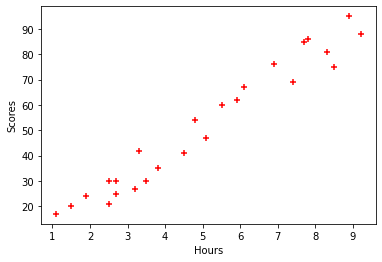

In [12]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(data.Hours,data.Scores, color='red',marker='+')

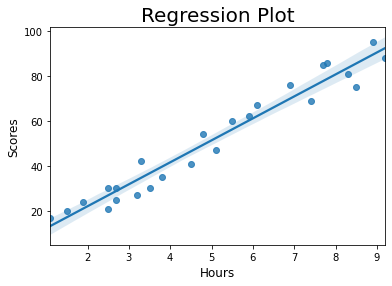

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [13]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()
print(data.corr())


### STEP 5- Training The Model

In [14]:
#Splitting the data
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


In [15]:
#Fitting the data into the model
reg = LinearRegression()
reg.fit(train_X, train_y)


LinearRegression()

In [16]:
#Predicting the Marks percentage
pred_y = reg.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


# Comparing the Predicted Marks with the Actual Marks

In [17]:
comparing_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
comparing_scores


,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually Comparing the Predicted Marks with the Actual Marks 

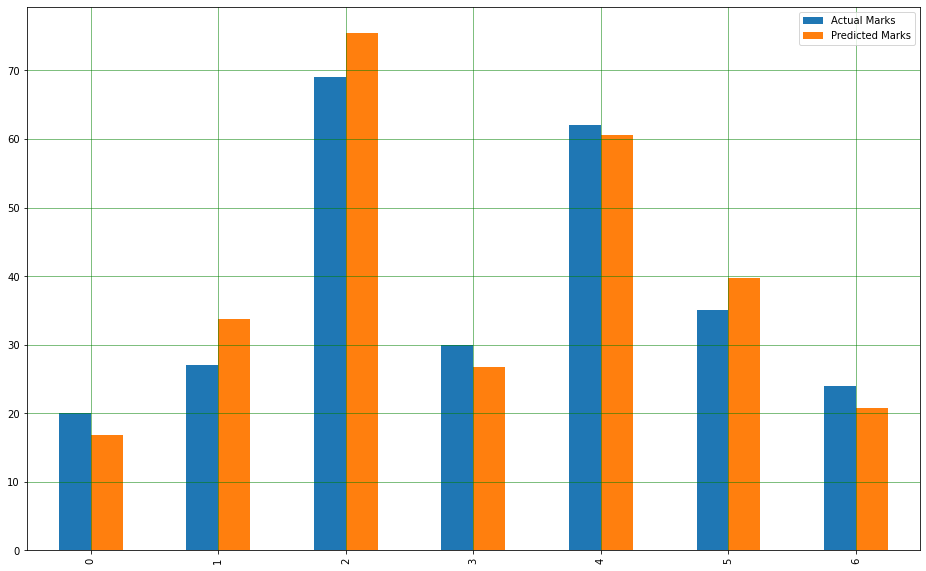

In [18]:
df1 = comparing_scores.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### STEP-6  Evaluating The Model 

In [19]:
# Error Matrics
# Calculating the accuracy of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(val_y, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, pred_y)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


# the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [20]:
hours = [9.25]
answer = reg.predict([hours])
print("Score = {}".format(round(answer[0],3)))


Score = 93.893
